In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import json

## Densenet Losses

In [43]:
# Opening JSON file
history_gan = open('./Resnet_DenseNet_Model/Densenet_New/history/history_densenet_gan-data.json')
history_mixed = open('./Resnet_DenseNet_Model/Densenet_New/history/history_mixed.json')
history_original = open('./Resnet_DenseNet_Model/Densenet_New/history/history_original.json')

In [44]:
data_gan = json.load(history_gan)
data_mixed = json.load(history_mixed)
data_original = json.load(history_original)

In [45]:
data_gan = pd.DataFrame(eval(data_gan))
data_mixed = pd.DataFrame(eval(data_mixed))
data_original = pd.DataFrame(eval(data_original))

In [46]:
data_gan = data_gan.iloc[:, :4]
data_mixed = data_mixed.iloc[:, :4]
data_original = data_original.iloc[:, :4]

In [47]:
def plot_loss_densenet(dataframe, trained):

    plt.rcParams["figure.figsize"] = (12,6)
    dataframe.plot()
    plt.title(f'Densenet trained on {trained} data', fontsize = 16)
    plt.xlabel('Epoch')
    plt.ylabel('Score')

    plt.savefig(f'D:/Medical_Imaging/Medical_Imaging_Elias/Figures/densenet_loss_plot/densnet_loss_{trained}.png')

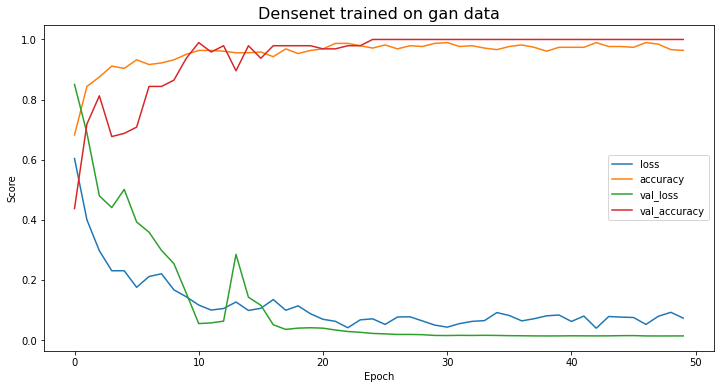

In [48]:
plot_loss_densenet(data_gan, 'gan')

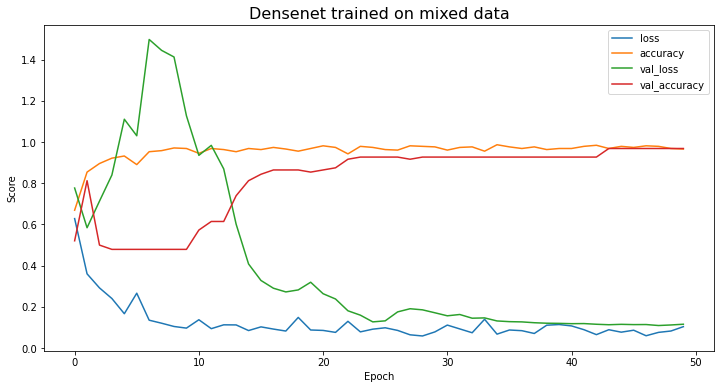

In [49]:
plot_loss_densenet(data_mixed, 'mixed')

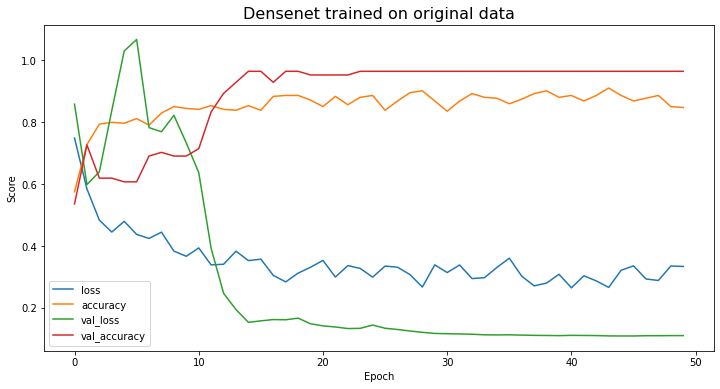

In [50]:
plot_loss_densenet(data_original, 'original')

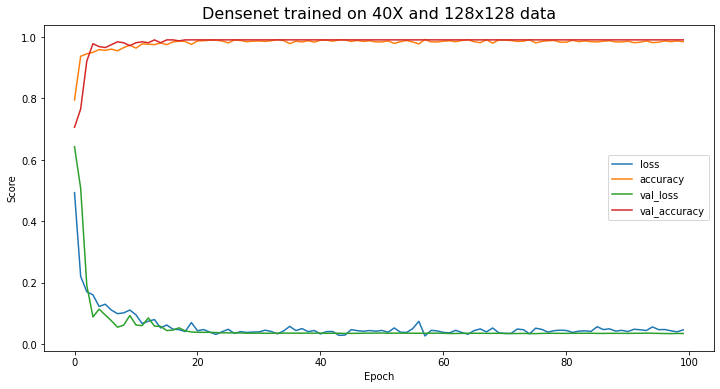

In [51]:
history_temp = open(r'C:\Users\elias\Downloads\history_40x_128.json')
data_temp = json.load(history_temp)
data_temp = pd.DataFrame(eval(data_temp))
data_temp = data_temp.iloc[:, :4]
plot_loss_densenet(data_temp, '40X and 128x128')

## Gan Losses

In [52]:
dataframe_adenosis = pd.read_csv('D:/Medical_Imaging/Medical_Imaging_Zusatz/CSV_Loss/gan_loss_adenosis.csv')
dataframe_phyllodes = pd.read_csv('D:/Medical_Imaging/Medical_Imaging_Zusatz/CSV_Loss/gan_loss_phyllodes.csv')
dataframe_papillary = pd.read_csv('D:/Medical_Imaging/Medical_Imaging_Zusatz/CSV_Loss/gan_loss_papillary.csv')

In [53]:
def plot_plot(dataframe, losstype, titlename, adversarial = False):

    # plt.figure(figsize = (10, 6))
    plt.title("{} Loss for {}".format(losstype, titlename))

    if adversarial:

        plt.plot(dataframe['step'], dataframe['a_loss'], label = "Adversarial Loss", color = "orange")

    else:

        plt.plot(dataframe['step'], dataframe['d_loss'], label = "Generator Loss")

        
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig(f'D:/Medical_Imaging/Medical_Imaging_Elias/Figures/gan_losses/gan_loss{losstype}_{titlename}.png')

    plt.show()

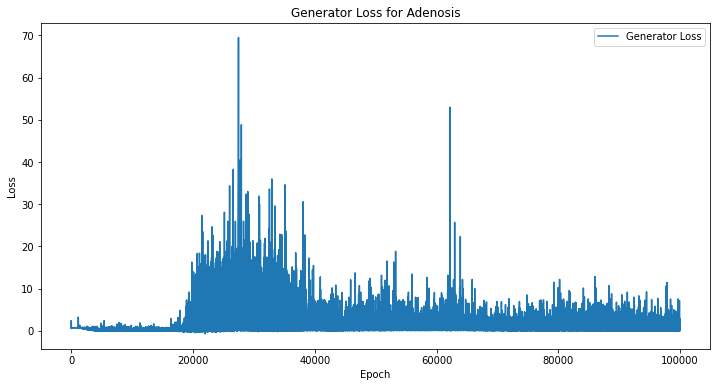

In [54]:
plot_plot(dataframe_adenosis, 'Generator', 'Adenosis')

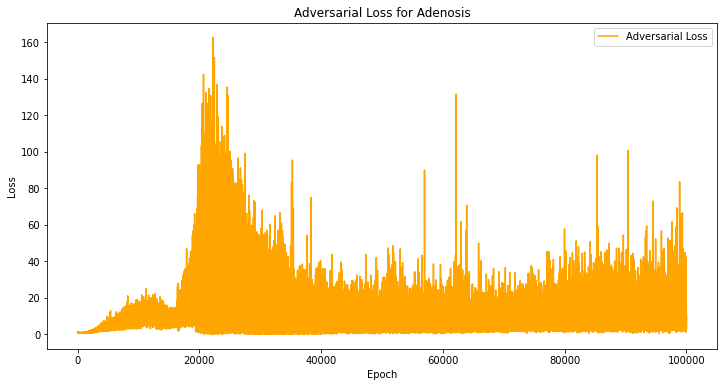

In [55]:
plot_plot(dataframe_adenosis, 'Adversarial', 'Adenosis', True)

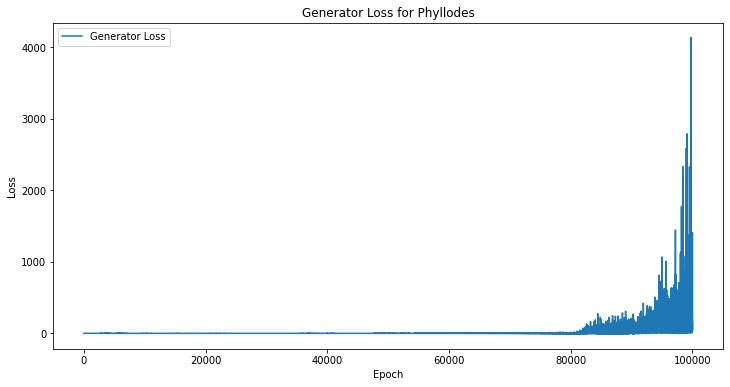

In [56]:
plot_plot(dataframe_phyllodes, 'Generator', 'Phyllodes')

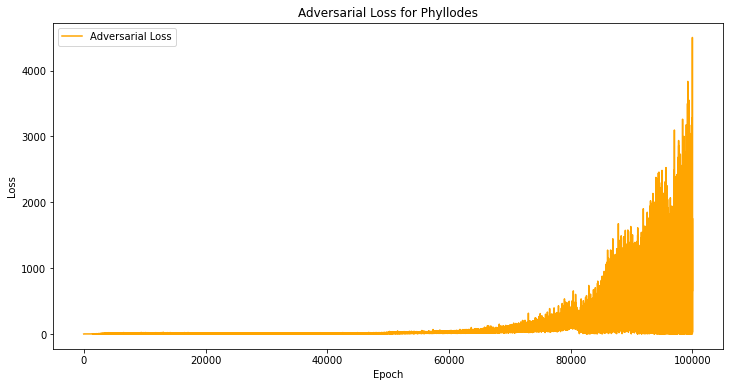

In [57]:
plot_plot(dataframe_phyllodes, 'Adversarial', 'Phyllodes', True)

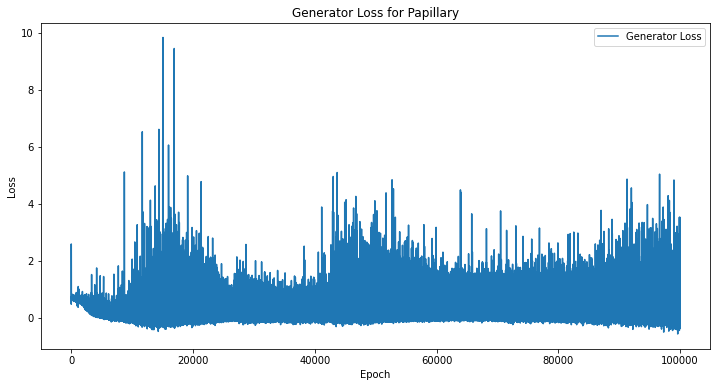

In [58]:
plot_plot(dataframe_papillary, 'Generator', 'Papillary')

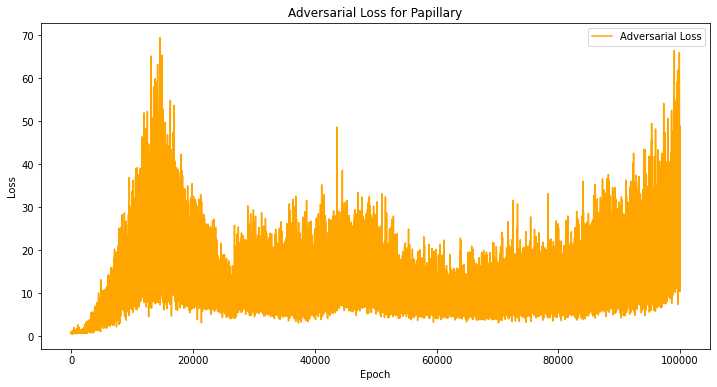

In [59]:
plot_plot(dataframe_papillary, 'Adversarial', 'Papillary', True)